In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df["Na_to_K"]
# tento stlpec odkazuje na pomer sodika k drasliku v ludskom tele 
# (odporucany je 1:3, teda prijem draslika by mal byt 3x vacsi)

0      25.355
1      13.093
2      10.114
3       7.798
4      18.043
        ...  
195    11.567
196    12.006
197     9.894
198    14.020
199    11.349
Name: Na_to_K, Length: 200, dtype: float64

In [4]:
print('Počet prázdnych dát v datasete: ' + str(df.isnull().sum().sum())) # overenie, ci dataframe neobsahuje nejake prazdne zaznamy

Počet prázdnych dát v datasete: 0


In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
print(f'''Drugs: {df['Drug'].unique()}, 
Sex: {df['Sex'].unique()}
Blood Pressure: {df['BP'].unique()}
Cholesterol: {df['Cholesterol'].unique()}''')
# vypis hodnot jednotlivych parametrov pre vacis prehlad
# typy liekov: A, B, C, X, Y
# pohlavie: Male, Female
# parameter krvny tlak ma 3 urovne: High, Low, Normal
# cholesterol ma 2 urovne: High, Normal

Drugs: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB'], 
Sex: ['F' 'M']
Blood Pressure: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']


# Vizualizácia dát
Rozhodol som sa vizualizovať tento dataframe na základe veku a pomeru sodíka k draslíku (Na_to_K) pre štyri parametre - Pohlavie (Sex), krvný tlak (BP), hladina cholesterolu (Cholesterol) a samotný liek (Drug)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

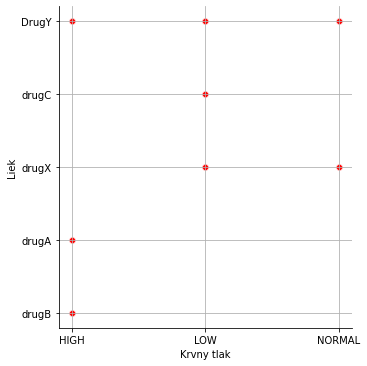

In [12]:
plt.rcParams["figure.figsize"] = (10,3)
sns.relplot(x='BP', y='Drug', data=df, color='red')
plt.xlabel('Krvny tlak')
plt.ylabel('Liek')
plt.grid()

Táto vizualizácia 

In [ ]:
sns.countplot(df["Drug"]) # vizualizacia poctu vyskytu jednotlivych liekov v dataframe

# Predspracovanie dát

In [ ]:
# kedze stlpec liek je v stringu, potrebujem s nim pracovat, ako s cislom, pouzijem funkciu Categorical na zaradenie
# do fitkivnych kategorii a nasledne .cat.codes pre vyjadrenie jednotlivych kategorii cislom
# vytvori sa novy stlpec, reprezentujuci cislom druh liekov
# df['Drug'] = pd.Categorical(df['Drug'])
# df['DrugCat'] = df['Drug'].cat.codes
# df.head()

In [ ]:
# je potrebne este predspracovat kategoricke premenne pohlavie (sex), krvny tlak (BP) a hladinu cholesterolu (Cholesterol)
# funckia get_dummies mi prevedie kategoricku premennu na fiktivne premenne, teda dostanem nove stlpce s nulami
# a jednotkami, dalej mozem pracovat s cislami
dummies = pd.get_dummies(df[['Sex', 'BP', 'Cholesterol']])
dummies.head()

In [ ]:
# naslednuje spojenie fiktivneho dataframu dummies s mojim povodnym dataframeom df 
df = pd.concat([df,dummies], axis = 1)
df.head()

In [ ]:
# ked uz mam prevedene kategoricke premenne na ciselne pre kazdy zaznam, mozem z dataframeu vymazat povodne stlpce
# sex, BP a Cholesterol
df = df.drop(['Sex', 'BP', 'Cholesterol'], axis = 1)
df.head()

In [ ]:
df.columns # kontrola, ake vsetky stlpce dataframe obsahuje

# Train Test Split
Použitie nástroju Train Test Split pre rýchle a efektívne rozdelenie dát do trénovacích a testovacích premnných, ktoré následne použijem pri učení

In [ ]:
X = df[['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW','BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']]
Y = df['Drug']
Y = pd.get_dummies(Y)
# vytvorenie matice X s alokaciou zaznamov, na zaklade ktorych chcem trenovat neuronovu siet
# vytvorenie matice Y s alokaciou druhov liekov

In [ ]:
X.shape, Y.shape

In [ ]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.25, random_state = 42)
# pouzitie train test split pre ucely klasifikacie dat
# do trenovacih premennych si alokujem 2/3 dat z dataframeu
# do testovacich premennych si alokujem zvysnu 1/3 dat z dataframe, co urcuje parameter test_size, random_state vybera nahodne hodnoty

In [ ]:
for setd,name in zip([X_train,X_test,Y_train,Y_test],['X_train','X_test','Y_train','Y_test']):
  print(name + ' shape : ' + str(setd.shape))
# overenie velkosti test a train premennych

# Trénovanie neurónovej siete

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout

In [ ]:
model = Sequential([
    Flatten(input_dim=9),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

# Dropout zabranuje pretrenovaniu (overfitting) neuronovej siete, 50 % udajov sa nepouzije

In [ ]:
history = model.fit(X_train, Y_train, batch_size=10, validation_data=(X_test, Y_test), 
                    epochs=250, verbose=2)
# batch_size je parameter urcujuci, kolko udajov sa spracovava v jednej iteracii
# verbose je parameter pre vyhlad vypisu, so vsetko bude obsahovat (1 = kompletny) 